In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [75]:
data = pd.read_csv("/home/pydev/workflow/dt_learn_data_science/public_projects/instagrams_reach/Instagram_data.csv", encoding = 'latin1')
data.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...


In [76]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [77]:
data = data.dropna()

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


<Figure size 800x640 with 0 Axes>

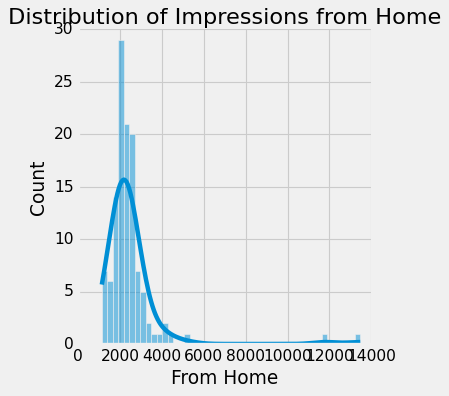

In [79]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')

sns.displot(data['From Home'], kde=True)
plt.title("Distribution of Impressions from Home")
plt.show()

<Figure size 800x640 with 0 Axes>

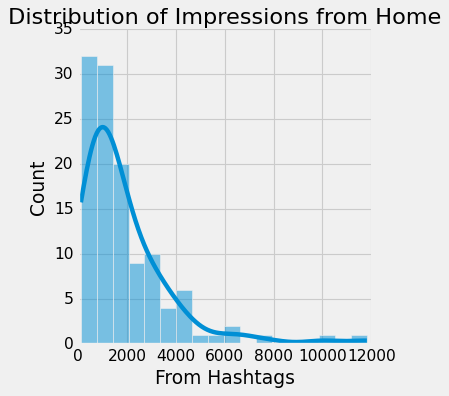

In [80]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')

sns.displot(data['From Hashtags'], kde=True)
plt.title("Distribution of Impressions from Home")
plt.show()

<Figure size 800x640 with 0 Axes>

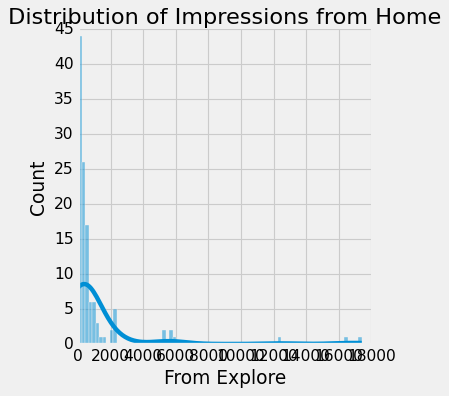

In [81]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')

sns.displot(data['From Explore'], kde=True)
plt.title("Distribution of Impressions from Home")
plt.show()

In [82]:
home     = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore  = data["From Explore"].sum()
other    = data["From Other"].sum()

labels   = ["From Home", "From Hashtags", "From Explore", "From Other"]
values   = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, title="Impressions on instarams posts form variuos sources", hole=0.5)
fig.show()

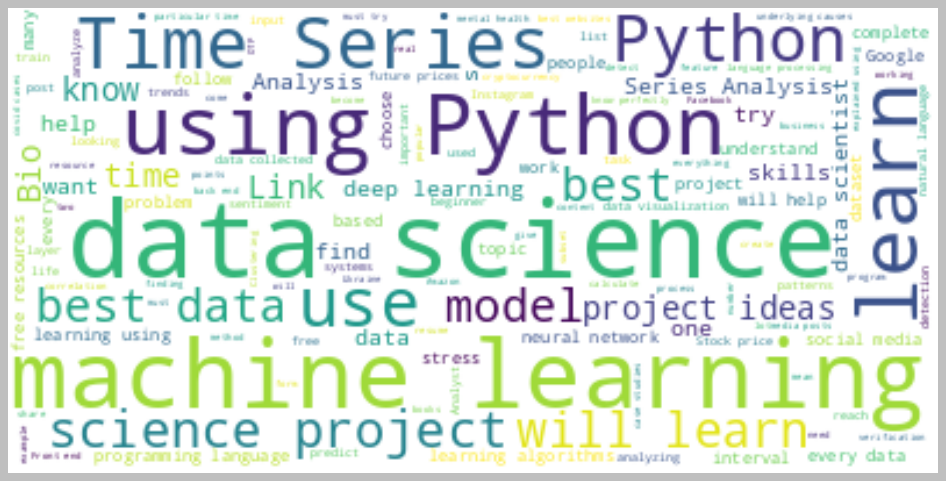

In [83]:
text       = " ".join(i for i in data.Caption)
stopwords  = set(STOPWORDS)
worldcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(15,10))
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

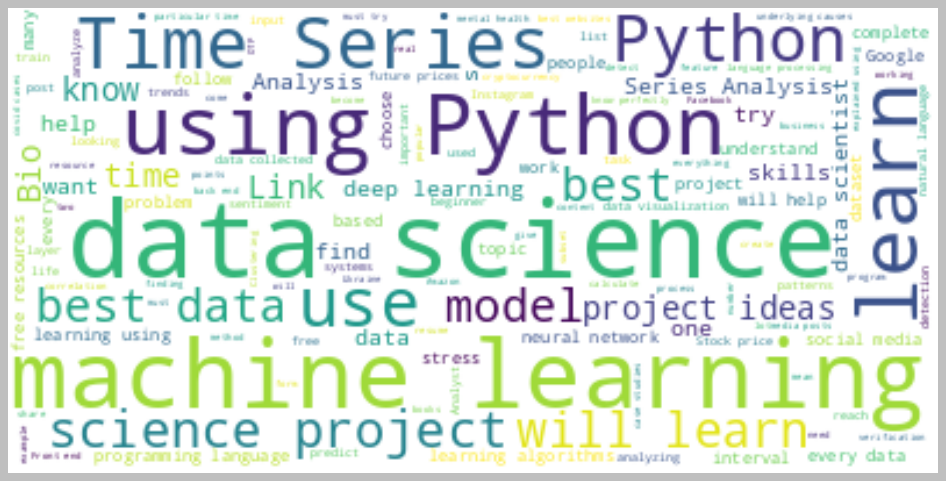

In [84]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [85]:
figure = px.scatter(data_frame=data, x="Impressions", y="Likes", 
                    size="Likes", trendline="ols", title="Relationships between like and impressions")
figure.show()

In [86]:
figure = px.scatter(data_frame=data, x="Impressions", y="Comments", 
                    size="Comments", trendline="ols", title="Relationships between Comments and total impressions")
figure.show()

In [87]:
figure = px.scatter(data_frame=data, x="Impressions", y="Shares", 
                    size="Shares", trendline="ols", title="Relationships between Shares and total impressions")
figure.show()

In [88]:
figure = px.scatter(data_frame=data, x="Impressions", y="Saves", 
                    size="Saves", trendline="ols", title="Relationships between Saves and total impressions")
figure.show()

In [89]:
correction = data.corr(numeric_only=True)
correction["Impressions"].sort_values(ascending=False)

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

In [90]:
conversion_rate = (data["Follows"].sum()/data["Profile Visits"].sum() * 100)
conversion_rate

41.00265604249668

In [91]:
figure = px.scatter(data_frame=data, x="Profile Visits", y="Follows", 
                    size="Follows", trendline="ols", title="Relationships between Profile Visits and followers gained")
figure.show()

In [92]:
x = np.array(data[["Likes", "Saves", "Comments", "Shares", "Profile Visits", "Follows"]])
y = np.array(data["Impressions"])

In [93]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [96]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.7538458240597674

In [97]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10387.69286914])

In [95]:
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
